Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

Строка names уже задана.

In [1]:
# names_list = names.split(", ")

В переменной df содержатся данные такого вида

In [19]:
import pandas as pd
d = {'client_id': [9002, 6722, 8799, 8737, 5208],
     'sex': [1, 1, 1, 0, 0],
     'wealth': ['medium', 'high', 'high', 'low', 'medium'],
     'age': [63, 54, 62, 54, 37]}
df = pd.DataFrame(data=d)

Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.

In [3]:
medium_35 = df.query('wealth == "medium" & age > 35')

Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:

In [15]:
d = {'Клиент id': [9002, 6722, 8799, 8737, 5208],
     'Пол': [1, 1, 1, 0, 0],
     'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
     'Возраст': [63, 54, 62, 54, 37]}
df = pd.DataFrame(data=d)

Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [16]:
df = df.rename(columns={'Клиент id':'client_id',
                        'Пол':'sex',
                        'Благосостояние':'wealth',
                        'Возраст':'age'})

Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булиновское значение)

In [6]:
df['older_than_30'] = df.age > 30

А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [7]:
unique_num = df.nunique()

У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:

In [20]:
dat = {'client_id': [9002, 6722, 8799, 8737, 5208],
     'amount': [42331, 88420, 1714, 80572, 57549],
     'date': ['1585425830', '15854259536', '1585427761', '1585427077', '1585426290']}
data = pd.DataFrame(data=dat)

Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

Предыдущий датафрейм загружен в переменную df, новый – в data 

In [21]:
full_data = data.merge(df, on='client_id', how='left')

Напишите функцию read_n_agg, которая: <br>
    принимает на вход один параметр – путь к файлу <br>
    считывает переданный файл, в котором разделителем является ; <br>
    считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True) <br>
    возвращает результат этих действий (агрегированный датафрэйм)

In [24]:
def read_n_agg(path_to_file):
    df  = pd.read_csv(path_to_file, sep=';')
    df_ = df.groupby('company', as_index=False).agg({'income':'mean'})
    
    return df_
read_n_agg('3_companies.csv')

,company,income
0,En +,9.962187e+10
1,"АО «Александрова, Савельев и Мельникова»",7.206782e+10
2,АО «Андреев-Анисимов»,6.931948e+09
3,АО «Андреев-Макарова»,8.934380e+10
4,АО «Большаков Кошелева»,7.860861e+10
...,...,...
284,Щекиноазот,4.309092e+10
285,Щукин Лимитед,6.703036e+10
286,Эйвон Бьюти Продактс Компани (Avon),2.503657e+10
287,Яковлева Инкорпорэйтед,3.523436e+10


Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.

In [25]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [26]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [32]:
int((taxi.source.value_counts().max() / taxi.source.value_counts().sum())*100)

42

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
<br>
    Посчитайте частоту встречаемости каждой из оценок 
    <br>Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
    <br>Сбросьте индексы
    <br>Переименуйте колонки в driver_score и percentage
    <br>Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
    <br>Запишите результат в driver_score_counts

In [40]:
driver_score_counts = (taxi.driver_score.value_counts() / taxi.driver_score.value_counts().sum()).mul(100).round(2) \
                        .reset_index() \
                        .rename(columns={'index':'driver_score', 'driver_score':'percentage'}) \
                        .sort_values('percentage')

In [35]:
driver_score_counts

,percentage,count
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


Теперь строим график! 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

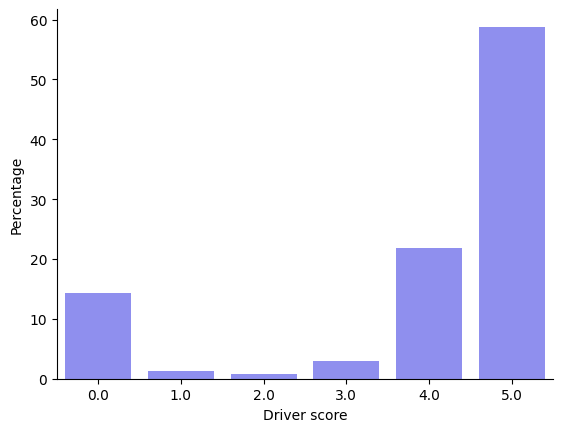

In [43]:
ax = sns.barplot(x='percentage', y='count', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?

In [44]:
rider_score_counts = (taxi.rider_score.value_counts() / taxi.rider_score.value_counts().sum()).mul(100).round(2) \
                        .reset_index() \
                        .rename(columns={'index':'rider_score', 'rider_score':'percentage'}) \
                        .sort_values('percentage')

In [46]:
rider_score_counts

,percentage,count
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


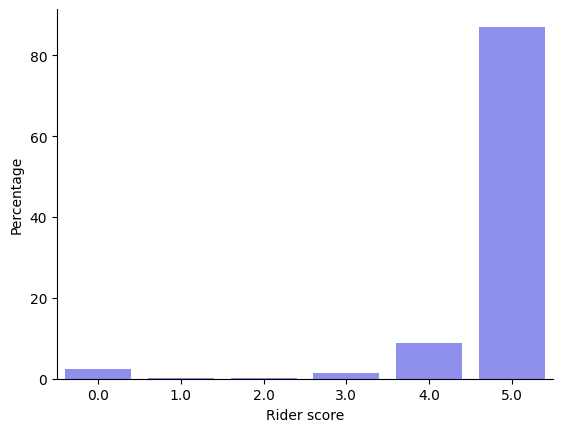

In [47]:
ax = sns.barplot(x='percentage', y='count', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [48]:
# Более чем в 80% случаев водители поставили клиентам 5 звездочек
# Водители ставят меньше 0, чем клиенты